# Cow Health Predictor

## 1) Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2) Load the dataset

In [2]:
df = pd.read_excel('C:/Users/dell/Documents/tenserflow/Cow Health Predictor/cattle_dataset.xlsx')

## 3) Initial Data Exploration

### 3.1) Displaying the first few rows of the dataset

In [3]:
df.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status
0,38.2,Cross Breed,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy
1,38.9,Normal Breed,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy
2,38.6,Cross Breed,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy
3,39.5,Normal Breed,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy
4,39.7,Normal Breed,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy


### 3.2) Display basic information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_temperature      178 non-null    float64
 1   breed_type            178 non-null    object 
 2   milk_production       178 non-null    float64
 3   respiratory_rate      178 non-null    int64  
 4   walking_capacity      178 non-null    int64  
 5   sleeping_duration     178 non-null    float64
 6   body_condition_score  178 non-null    int64  
 7   heart_rate            178 non-null    int64  
 8   eating_duration       178 non-null    float64
 9   lying_down_duration   178 non-null    float64
 10  ruminating            178 non-null    float64
 11  rumen_fill            178 non-null    int64  
 12  faecal_consistency    178 non-null    object 
 13  health_status         178 non-null    object 
dtypes: float64(6), int64(5), object(3)
memory usage: 19.6+ KB


### 3.3) Display summary statistics of the dataset

In [5]:
df.describe()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,39.011236,14.770787,28.685393,9303.179775,4.934831,2.910112,53.955056,2.825843,13.957303,4.888764,2.741573
std,0.872225,6.615735,9.768617,3237.390592,1.559668,1.254510,13.157808,0.760542,1.512650,1.173477,1.047225
min,35.500000,5.100000,14.000000,5004.000000,2.800000,1.000000,37.000000,1.300000,6.000000,3.000000,1.000000
25%,38.300000,9.700000,21.000000,6019.000000,3.500000,2.000000,42.000000,2.200000,12.900000,3.600000,2.000000
50%,38.900000,13.600000,28.000000,11203.000000,4.200000,3.000000,50.000000,2.900000,13.800000,5.000000,3.000000
75%,39.700000,21.200000,36.000000,12291.000000,6.500000,4.000000,63.000000,3.400000,15.100000,5.900000,3.000000
max,40.600000,26.500000,49.000000,13257.000000,7.200000,5.000000,83.000000,4.900000,16.400000,7.000000,5.000000


## 4) Handle Missing Values

### 4.1) Check for missing values in the dataset

In [6]:
df.isnull().sum()

body_temperature        0
breed_type              0
milk_production         0
respiratory_rate        0
walking_capacity        0
sleeping_duration       0
body_condition_score    0
heart_rate              0
eating_duration         0
lying_down_duration     0
ruminating              0
rumen_fill              0
faecal_consistency      0
health_status           0
dtype: int64

In [7]:
df.isna().sum()

body_temperature        0
breed_type              0
milk_production         0
respiratory_rate        0
walking_capacity        0
sleeping_duration       0
body_condition_score    0
heart_rate              0
eating_duration         0
lying_down_duration     0
ruminating              0
rumen_fill              0
faecal_consistency      0
health_status           0
dtype: int64

### 4.2) Fill missing values appropriately

There are no missing values.

## 5) Checking for Categorical Variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_temperature      178 non-null    float64
 1   breed_type            178 non-null    object 
 2   milk_production       178 non-null    float64
 3   respiratory_rate      178 non-null    int64  
 4   walking_capacity      178 non-null    int64  
 5   sleeping_duration     178 non-null    float64
 6   body_condition_score  178 non-null    int64  
 7   heart_rate            178 non-null    int64  
 8   eating_duration       178 non-null    float64
 9   lying_down_duration   178 non-null    float64
 10  ruminating            178 non-null    float64
 11  rumen_fill            178 non-null    int64  
 12  faecal_consistency    178 non-null    object 
 13  health_status         178 non-null    object 
dtypes: float64(6), int64(5), object(3)
memory usage: 19.6+ KB


In [9]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['breed_type', 'faecal_consistency', 'health_status'], dtype='object')

We see 'breed_type', 'faecal_consistency' and 'health_status' are the columns with categorical values

#### breed_type

There are total 2 unique values in 'breed_type' column

In [10]:
df.breed_type.nunique()

2

Count of each unique value in 'breed_type' column

In [11]:
df['breed_type'].value_counts()

breed_type
Cross Breed     90
Normal Breed    88
Name: count, dtype: int64

#### faecal_consistency

There are total 6 unique values in 'faecal_consistency' column

In [12]:
df.faecal_consistency.nunique()

6

Count of each unique value in 'faecal_consistency' column

In [13]:
df['faecal_consistency'].value_counts()

faecal_consistency
ideal                    90
extremely firm           24
Black faeces             22
Fresh blood in faeces    20
very liquid faeces       20
Black faece               2
Name: count, dtype: int64

#### health_status

There are total 2 unique values in 'health_status' column

In [14]:
df.health_status.nunique()

2

Count of each unique value in 'health_status' column

In [15]:
df['health_status'].value_counts()

health_status
healthy      90
unhealthy    88
Name: count, dtype: int64

#### body_condition_score

Some time there is a case where the column with categorical values is of integer type instead of object type. Here we see 'body_condition_score' column as an example of it.

So we will convert 'body_condition_score' column to object(str) type.

We are doing this because One Hot Ecoding can be applied on the categorical columns of object dtype.

In [16]:
df['body_condition_score'] = df['body_condition_score'].astype(str)
df['body_condition_score'].dtype

dtype('O')

There are total 5 unique values in health_status column

In [17]:
df.body_condition_score	.nunique()

5

Count of each unique value in 'body_condition_score' column

In [18]:
df['body_condition_score'].value_counts()	

body_condition_score
3    60
2    38
1    28
4    26
5    26
Name: count, dtype: int64

## 6) Convert Categorical Variables

In [19]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['breed_type', 'body_condition_score', 'faecal_consistency',
       'health_status'],
      dtype='object')

We are not taking 'health_status' column for one hot encoding as it is the target variable

In [20]:
object_columns = object_columns[0:3]
object_columns

Index(['breed_type', 'body_condition_score', 'faecal_consistency'], dtype='object')

Applying the one hot encoding on object_columns

In [21]:
dummies = pd.get_dummies(df[['breed_type', 'body_condition_score', 'faecal_consistency']] , dtype='int') 
dummies

,breed_type_Cross Breed,breed_type_Normal Breed,body_condition_score_1,body_condition_score_2,body_condition_score_3,body_condition_score_4,body_condition_score_5,faecal_consistency_Black faece,faecal_consistency_Black faeces,faecal_consistency_Fresh blood in faeces,faecal_consistency_extremely firm,faecal_consistency_ideal,faecal_consistency_very liquid faeces
0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,0,1,0,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1,0,0,0,0,1,0,0,0,1,0,0,0
174,1,0,0,0,0,1,0,0,1,0,0,0,0
175,1,0,0,0,1,0,0,0,0,0,1,0,0
176,1,0,0,0,1,0,0,0,0,0,0,0,1


## 7) Feature Engineering

### 7.1) Adding new features

We are adding the the features which we get from One Hot Encoding.

In [22]:
df = pd.concat([df , dummies] ,axis=1)
df.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,...,body_condition_score_2,body_condition_score_3,body_condition_score_4,body_condition_score_5,faecal_consistency_Black faece,faecal_consistency_Black faeces,faecal_consistency_Fresh blood in faeces,faecal_consistency_extremely firm,faecal_consistency_ideal,faecal_consistency_very liquid faeces
0,38.2,Cross Breed,13.6,36,12432,3.5,3,50,3.2,15.0,...,0,1,0,0,0,0,0,1,0,0
1,38.9,Normal Breed,24.1,37,11987,4.2,2,62,3.9,12.2,...,1,0,0,0,0,0,0,0,1,0
2,38.6,Cross Breed,14.7,42,13121,3.2,3,71,3.0,12.6,...,0,1,0,0,0,0,0,0,1,0
3,39.5,Normal Breed,26.2,29,12055,3.8,4,68,3.6,13.5,...,0,0,1,0,1,0,0,0,0,0
4,39.7,Normal Breed,22.5,48,10352,4.6,2,63,3.1,13.5,...,1,0,0,0,0,0,0,0,1,0


### 7.2) Droping the features

We are droping the features 'breed_type', 'body_condition_score', 'faecal_consistency' because they have been One hot Encoded.

In [23]:
df.drop(['breed_type', 'body_condition_score', 'faecal_consistency'] , axis=1 , inplace=True)
df.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,...,body_condition_score_2,body_condition_score_3,body_condition_score_4,body_condition_score_5,faecal_consistency_Black faece,faecal_consistency_Black faeces,faecal_consistency_Fresh blood in faeces,faecal_consistency_extremely firm,faecal_consistency_ideal,faecal_consistency_very liquid faeces
0,38.2,13.6,36,12432,3.5,50,3.2,15.0,6.0,3,...,0,1,0,0,0,0,0,1,0,0
1,38.9,24.1,37,11987,4.2,62,3.9,12.2,5.8,4,...,1,0,0,0,0,0,0,0,1,0
2,38.6,14.7,42,13121,3.2,71,3.0,12.6,5.9,2,...,0,1,0,0,0,0,0,0,1,0
3,39.5,26.2,29,12055,3.8,68,3.6,13.5,6.0,2,...,0,0,1,0,1,0,0,0,0,0
4,39.7,22.5,48,10352,4.6,63,3.1,13.5,6.3,5,...,1,0,0,0,0,0,0,0,1,0


### 7.3) Converting categorical target variable in form of 1 and 0

health_status = target variable

1 = healthy
0 = unhealthy

In machine learning, many algorithms and models require numerical input and output for mathematical operations. When working with categorical target variables (i.e., variables with distinct categories or classes), converting these categories into numerical values (like 0 and 1 for binary classification) is often necessary.

In [24]:
def partition(x):
    if x == 'healthy':
        return 1
    return 0

health_update = df['health_status']
t = health_update.map(partition)
df['health_status'] = t

df.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,...,body_condition_score_2,body_condition_score_3,body_condition_score_4,body_condition_score_5,faecal_consistency_Black faece,faecal_consistency_Black faeces,faecal_consistency_Fresh blood in faeces,faecal_consistency_extremely firm,faecal_consistency_ideal,faecal_consistency_very liquid faeces
0,38.2,13.6,36,12432,3.5,50,3.2,15.0,6.0,3,...,0,1,0,0,0,0,0,1,0,0
1,38.9,24.1,37,11987,4.2,62,3.9,12.2,5.8,4,...,1,0,0,0,0,0,0,0,1,0
2,38.6,14.7,42,13121,3.2,71,3.0,12.6,5.9,2,...,0,1,0,0,0,0,0,0,1,0
3,39.5,26.2,29,12055,3.8,68,3.6,13.5,6.0,2,...,0,0,1,0,1,0,0,0,0,0
4,39.7,22.5,48,10352,4.6,63,3.1,13.5,6.3,5,...,1,0,0,0,0,0,0,0,1,0


In [25]:
df['health_status']

0      0
1      1
2      1
3      0
4      1
      ..
173    0
174    0
175    0
176    0
177    0
Name: health_status, Length: 178, dtype: int64

Changing datatype of 'health_status' feature to integer

In [26]:
df['health_status'] = df['health_status'].astype(int)
df['health_status'].dtype

dtype('int32')

## 8) Train/Test Split

#### Seperating 'health_status' column from datafrme and creating a seperate dataframe out of it.

In [27]:
y = df['health_status']
X = df.drop('health_status', axis=1)

In [28]:
X

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,...,body_condition_score_2,body_condition_score_3,body_condition_score_4,body_condition_score_5,faecal_consistency_Black faece,faecal_consistency_Black faeces,faecal_consistency_Fresh blood in faeces,faecal_consistency_extremely firm,faecal_consistency_ideal,faecal_consistency_very liquid faeces
0,38.2,13.6,36,12432,3.5,50,3.2,15.0,6.0,3,...,0,1,0,0,0,0,0,1,0,0
1,38.9,24.1,37,11987,4.2,62,3.9,12.2,5.8,4,...,1,0,0,0,0,0,0,0,1,0
2,38.6,14.7,42,13121,3.2,71,3.0,12.6,5.9,2,...,0,1,0,0,0,0,0,0,1,0
3,39.5,26.2,29,12055,3.8,68,3.6,13.5,6.0,2,...,0,0,1,0,1,0,0,0,0,0
4,39.7,22.5,48,10352,4.6,63,3.1,13.5,6.3,5,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,39.9,6.8,28,6942,7.1,47,1.9,15.0,3.1,3,...,0,0,1,0,0,0,1,0,0,0
174,40.2,7.2,20,6652,6.5,41,2.0,15.5,3.6,4,...,0,0,1,0,0,1,0,0,0,0
175,39.8,7.7,16,6705,6.6,37,2.6,14.8,4.2,3,...,0,1,0,0,0,0,0,1,0,0
176,39.5,5.7,21,6272,6.8,45,2.2,15.0,3.1,2,...,0,1,0,0,0,0,0,0,0,1


In [29]:
y

0      0
1      1
2      1
3      0
4      1
      ..
173    0
174    0
175    0
176    0
177    0
Name: health_status, Length: 178, dtype: int32

#### Taking 30% of dataframe as testing and 70% as training.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=None)

In [31]:
X_train

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,...,body_condition_score_2,body_condition_score_3,body_condition_score_4,body_condition_score_5,faecal_consistency_Black faece,faecal_consistency_Black faeces,faecal_consistency_Fresh blood in faeces,faecal_consistency_extremely firm,faecal_consistency_ideal,faecal_consistency_very liquid faeces
72,39.8,7.1,16,5513,7.1,41,2.6,14.3,3.2,2,...,0,1,0,0,0,0,1,0,0,0
158,39.6,6.7,22,5012,6.8,44,2.2,15.0,4.5,3,...,0,1,0,0,0,0,0,1,0,0
75,39.6,5.2,17,6128,6.2,39,2.0,15.8,3.3,2,...,1,0,0,0,0,0,0,0,0,1
81,39.7,5.3,15,5127,6.9,41,2.1,15.0,3.0,2,...,0,1,0,0,0,0,0,1,0,0
32,39.8,17.7,23,6132,6.4,47,2.1,15.5,3.9,3,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,38.3,9.7,44,11203,3.9,62,2.7,12.8,5.0,1,...,0,0,0,0,0,0,0,0,1,0
168,39.9,6.1,14,6197,6.7,43,2.2,15.1,4.2,3,...,0,1,0,0,0,0,0,1,0,0
147,38.5,12.4,36,12631,3.2,69,4.0,13.4,5.9,3,...,0,0,0,1,0,0,0,0,1,0
97,38.1,25.6,33,13257,3.8,52,4.6,12.8,7.0,4,...,0,0,0,1,0,0,0,0,1,0


In [32]:
y_train

72     0
158    0
75     0
81     0
32     0
      ..
149    1
168    0
147    1
97     1
82     0
Name: health_status, Length: 124, dtype: int32

In [33]:
print(X_train.shape)
print(y_train.shape)

(124, 23)
(124,)


In [34]:
X_test

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,...,body_condition_score_2,body_condition_score_3,body_condition_score_4,body_condition_score_5,faecal_consistency_Black faece,faecal_consistency_Black faeces,faecal_consistency_Fresh blood in faeces,faecal_consistency_extremely firm,faecal_consistency_ideal,faecal_consistency_very liquid faeces
132,39.6,15.9,28,6335,5.9,47,2.1,16.0,3.5,3,...,1,0,0,0,0,0,0,0,0,1
101,38.5,23.2,45,12065,3.1,76,3.0,13.7,5.2,2,...,1,0,0,0,0,0,0,0,1,0
167,40.6,7.8,15,6357,6.2,45,2.5,15.3,4.7,5,...,0,0,1,0,0,0,1,0,0,0
34,40.0,14.1,19,5173,7.0,39,1.6,15.4,3.0,2,...,0,0,0,0,0,0,0,1,0,0
58,38.5,12.4,36,12631,3.2,69,4.0,13.4,5.9,3,...,0,0,0,1,0,0,0,0,1,0
88,39.6,5.1,20,5289,6.1,42,1.6,16.3,3.0,1,...,0,0,0,0,0,0,0,0,0,1
165,39.8,6.1,16,6271,6.9,38,2.8,14.3,3.1,4,...,0,0,1,0,0,1,0,0,0,0
86,39.8,7.7,16,6705,6.6,37,2.6,14.8,4.2,3,...,0,1,0,0,0,0,0,1,0,0
135,40.3,13.2,26,5136,7.2,47,2.4,14.4,3.5,2,...,0,1,0,0,0,0,1,0,0,0
113,38.1,24.9,27,12694,3.3,81,4.0,14.1,6.3,3,...,0,1,0,0,0,0,0,0,1,0


In [35]:
y_test

132    0
101    1
167    0
34     0
58     1
88     0
165    0
86     0
135    0
113    1
29     0
103    1
17     1
128    0
68     0
160    0
169    0
69     0
145    1
52     1
55     1
10     1
118    0
26     1
141    1
9      1
163    0
99     1
28     0
77     0
96     1
111    1
89     0
73     0
175    0
33     0
24     1
7      1
8      1
171    0
151    1
50     1
12     1
21     1
90     1
3      0
134    0
46     0
107    1
140    1
40     0
117    0
87     0
98     1
Name: health_status, dtype: int32

In [36]:
print(X_test.shape)
print(y_test.shape)

(54, 23)
(54,)


Standardize the features of a X_train and X_test dataset

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 9) Building the model

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(y.unique()), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 10) Training the model

In [39]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5907 - loss: 0.6806
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8567 - loss: 0.5112 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9830 - loss: 0.3837 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9809 - loss: 0.2746 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9768 - loss: 0.2122 


## 11) Testing the model

In [40]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9877 - loss: 0.1874  


[0.20805314183235168, 0.9814814925193787]

In [41]:
y_predicted = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [42]:
y_predicted[0]

array([0.95734817, 0.04265191], dtype=float32)

Here we are checking some cases that our model predictions are right or not.

In [43]:
np.argmax(y_predicted[0])

0

In [44]:
y_test.iloc[0]

0

In [45]:
np.argmax(y_predicted[11])

1

In [46]:
y_test.iloc[11]

1

In [47]:
np.argmax(y_predicted[53])

1

In [48]:
y_test.iloc[53]

1

In [49]:
np.argmax(y_predicted[1])

1

In [50]:
y_test.iloc[1]

1

In [51]:
np.argmax(y_predicted[50])

0

In [52]:
y_test.iloc[50]

0

### Making the confusion matrix to see model accuracy

Making the predecdiction to original form

In [53]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1]

In [54]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27,  1],
       [ 0, 26]])>

Text(95.72222222222221, 0.5, 'Truth')

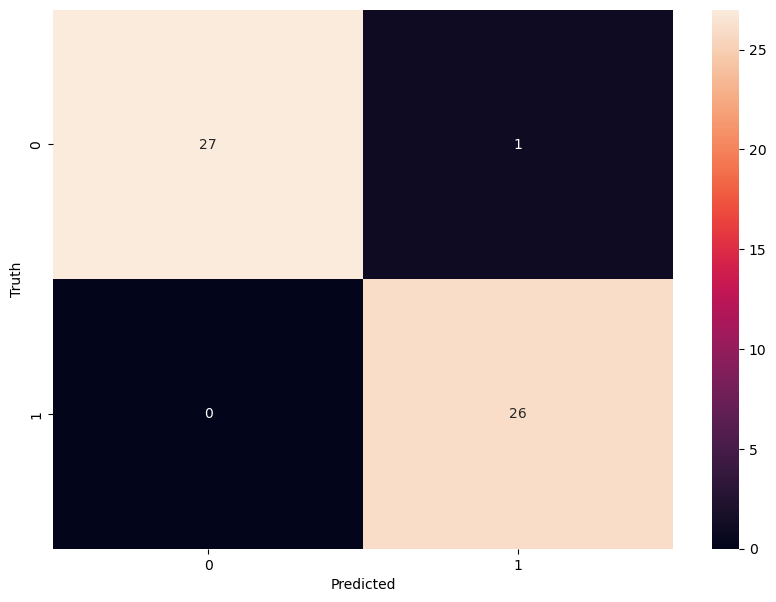

In [55]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')